This is an initial playground to work and interact with the chatbot

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

# Add the parent directory to the path so we can import 'src'
sys.path.append(os.path.abspath(".."))

print("Setup complete. Environment ready.")

Failed to read module file 'C:\Users\fleur\AppData\Local\Programs\Python\Python311\Lib\pydoc_data\topics.py' for module 'pydoc_data.topics': UnicodeDecodeError
Traceback (most recent call last):
  File "c:\Users\fleur\Desktop\MSDS\Classes\498 Captstone\GitHub\MSDS-498\Theo\baseball_chatbot\venv\Lib\site-packages\IPython\core\extensions.py", line 62, in load_extension
    return self._load_extension(module_str)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\fleur\Desktop\MSDS\Classes\498 Captstone\GitHub\MSDS-498\Theo\baseball_chatbot\venv\Lib\site-packages\IPython\core\extensions.py", line 77, in _load_extension
    mod = import_module(module_str)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\fleur\AppData\Local\Programs\Python\Python311\Lib\importlib\__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 120

Setup complete. Environment ready.


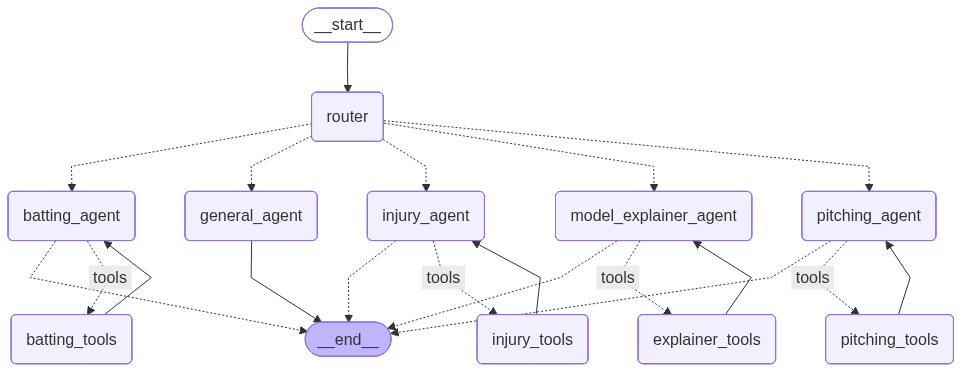

In [2]:
from IPython.display import Image, display
from src.graph import build_graph

# Compile the graph
app = build_graph()

# Draw the graph
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    print("Could not draw graph. (Requires mermaid-cli).")

In [4]:
from langchain_core.messages import HumanMessage
config = {"configurable": {"thread_id": "debug_session_5"}} 

print("Baseball Bot Ready! Type 'q' to exit.")
print("-----------------------------------------------------")

while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break

    inputs = {"messages": [HumanMessage(content=user_input)]}
    print(f"\nProcessing...")

    try:
        for event in app.stream(inputs, config=config):
            for node_name, node_output in event.items():
                
                if node_name == "router" and "next_agent" in node_output:
                    print(f"   [Router] Handoff to: '{node_output['next_agent']}'")
                
                print(f"--- Node '{node_name}' finished ---")

                # THE FIX: Iterate through all messages and only print the AI text
                if "messages" in node_output:
                    messages_list = node_output["messages"]
                    # Ensure it is a list before iterating
                    if not isinstance(messages_list, list):
                        messages_list = [messages_list]
                        
                    for msg in messages_list:
                        # Print only if it is an AI message with actual text
                        if msg.__class__.__name__ == "AIMessage" and msg.content:
                            print(f"BaseBot: {msg.content}")
        
        print("-" * 50)

    except Exception as e:
        print(f"Error: {e}")

Baseball Bot Ready! Type 'q' to exit.
-----------------------------------------------------

Processing...

[DEBUG] ROUTER RECEIVED FULL HISTORY:
   0. [HUMAN] Who won the 2000 world series?...

Current Profile: {}
   [Router] Handoff to: 'general_agent'
--- Node 'router' finished ---

 DEBUG: General Agent Memory Size: 1
   [0] human: Who won the 2000 world series?...
--- Node 'general_agent' finished ---
BaseBot: The New York Yankees won the 2000 World Series, defeating the New York Mets in five games.
--------------------------------------------------

Processing...

[DEBUG] ROUTER RECEIVED FULL HISTORY:
   0. [HUMAN] Who won the 2000 world series?...
   1. [AI] The New York Yankees won the 2000 World Series, defeating the New York Mets in five games....
   2. [HUMAN] Who was their pitcher?...

Current Profile: {}
   [Router] Handoff to: 'general_agent'
--- Node 'router' finished ---

 DEBUG: General Agent Memory Size: 3
   [0] human: Who won the 2000 world series?...
   [1] ai: The